In [1]:
from google.colab import auth
auth.authenticate_user()
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
!mkdir bucket
!gcsfuse gcommand ./bucket

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  27208      0 --:--:-- --:--:-- --:--:-- 27208
OK
23 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,278 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144618 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.30.0_amd64.deb ...
Unpacking gcsfuse (0.30.0) ...
Setting up gcsfuse (0.30.0) ...
Using mount point: /content/bucket
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PROJECT_PATH = '/content/drive/My Drive/Projects/Speech-Commands-Classification/'
MODELS_PATH = '/content/drive/My Drive/Projects/Speech-Commands-Classification/models/'
import sys
sys.path.append(PROJECT_PATH)
sys.path.append('/content/')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
pip install rootpath

     |████████████████████████████████| 235kB 7.5MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 4.9MB 14.9MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 337kB 50.6MB/s 
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8209 sha256=8b34ee3fc74d4662bc7086c2137490e1019ebf7b0dee76a67f740d0fd3bd7756
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built ordered-set
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.13.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is in

In [6]:
!unzip -qq /content/bucket/dataset.zip -d /content

In [7]:
import torch
from torch import optim
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt

from const import Consts
from data_handler.loaders import get_data_loaders
from model import LeNet, weight_init
from train import train, evaluation, test_model
from main import plot_graphs

In [8]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [10]:
train_loader, valid_loader, test_loader = get_data_loaders('/content/dataset/')

model = LeNet(35)
optimizer = optim.Adam(model.parameters(), lr=Consts.lr)
loss_criterion = nn.NLLLoss()
model.apply(weight_init)
model.to(device)
train_loss = []
val_loss = []
val_acc = []
for epoch in range(Consts.epochs):
    t_loss = train(model, train_loader, optimizer, loss_criterion, device)
    v_loss, v_acc = evaluation(model, valid_loader, loss_criterion, device)
    torch.save(model.state_dict(), f'{MODELS_PATH}epoch-{epoch + 1}.pth')
    train_loss.append(t_loss)
    val_loss.append(v_loss)
    val_acc.append(v_acc)
    print(f'train loss in epoch {epoch + 1} is: {t_loss}')
    print(f'validation loss in epoch {epoch + 1} is: {v_loss}')
    print(f'validation accuracy in epoch {epoch + 1} is: {v_acc}')

  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 1 is: 1.6151450742963214
validation loss in epoch 1 is: 0.7035144525460708
validation accuracy in epoch 1 is: 0.7955114717964132


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 2 is: 0.7793215377028712
validation loss in epoch 2 is: 0.5300013760152535
validation accuracy in epoch 2 is: 0.8409978960024046


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 3 is: 0.5789857177712798
validation loss in epoch 3 is: 0.4557223262695166
validation accuracy in epoch 3 is: 0.8692515779981965


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 4 is: 0.4560671699307803
validation loss in epoch 4 is: 0.435702585352537
validation accuracy in epoch 4 is: 0.8749624286143673


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 5 is: 0.35964815967560354
validation loss in epoch 5 is: 0.4299472068937925
validation accuracy in epoch 5 is: 0.8825768961025949


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 6 is: 0.29421629717919084
validation loss in epoch 6 is: 0.4355358753639918
validation accuracy in epoch 6 is: 0.8815749924857229


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 7 is: 0.23520970690383
validation loss in epoch 7 is: 0.4552825862923876
validation accuracy in epoch 7 is: 0.883578799719467


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 8 is: 0.19345211898023051
validation loss in epoch 8 is: 0.46254740132448763
validation accuracy in epoch 8 is: 0.883578799719467


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 9 is: 0.16215712088967926
validation loss in epoch 9 is: 0.46790789287441814
validation accuracy in epoch 9 is: 0.884079751527903


100%|██████████| 1326/1326 [02:10<00:00, 10.13commands/s]


train loss in epoch 10 is: 0.1345731207418226
validation loss in epoch 10 is: 0.5136647095473913
validation accuracy in epoch 10 is: 0.8866847009317703


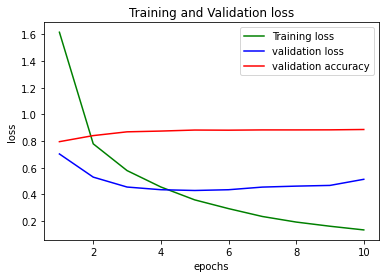

In [11]:
plot_graphs(train_loss, val_loss, val_acc)

In [12]:
test_model(model, test_loader, loss_criterion, val_loss, device, MODELS_PATH)

test accuracy is: 0.01526578827805543


# No need

In [ ]:
train_loss = np.array(train_loss)
val_loss = np.array(val_loss)
val_acc = np.array(val_acc)
np.save(f'{MODELS_PATH}train_loss.npy', train_loss)
np.save(f'{MODELS_PATH}vall_loss.npy', val_loss)
np.save(f'{MODELS_PATH}vall_acc.npy', val_acc)

In [ ]:
train_loader, valid_loader, test_loader = get_data_loaders('/content/dataset/')
model = LeNet(35)
optimizer = optim.Adam(model.parameters(), lr=Consts.lr)
loss_criterion = nn.NLLLoss()
model.apply(weight_init)
model.to(device)

LeNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=55936, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=35, bias=True)
  (activation): ReLU()
)

In [ ]:
train_loss = np.load(f'{MODELS_PATH}train_loss.npy')
val_loss = np.load(f'{MODELS_PATH}vall_loss.npy')
val_acc = np.load(f'{MODELS_PATH}vall_acc.npy')